<a href="https://colab.research.google.com/github/Ashleyyy66/e/blob/main/Chapter1_Unsupervised_Learning_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

The tasks in this notebook will be mainly two:
1. Discrimination of Sea ice and lead based on image classification based on Sentinel-2 optical data.
2. Discrimination of Sea ice and lead based on altimetry data classification based on Sentinel-3 altimetry data.

In [1]:
from google.colab import drive # Mount to your own google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.3 MB/s eta 0:00:00


# K-menas Clustering
## Basic Code Implementations

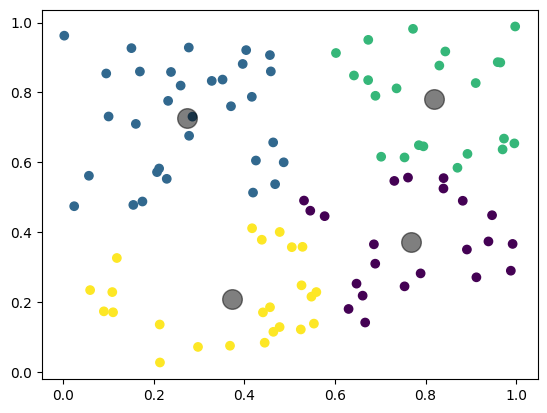

In [5]:
# Python code for K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# K-means model
kmeans = KMeans(n_clusters=4) #for specifying the number of classes, 4 in this case
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


## Gaussian Mixture Models (GMM) {cite}`bishop2006pattern`


### Basic Code Implementation

Below, you'll find a basic implementation of the Gaussian Mixture Model. This should serve as an initial guide for understanding the model and applying it to your data analysis projects.


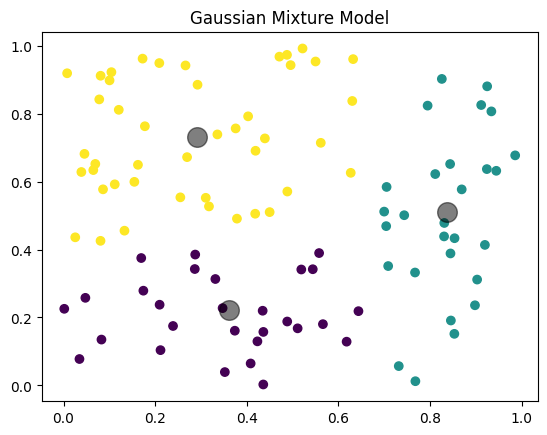

In [6]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# GMM model
gmm = GaussianMixture(n_components=3) #for specifying the number of classes, 3 in this case
gmm.fit(X)
y_gmm = gmm.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Gaussian Mixture Model')
plt.show()


## Image Classification
Now, let's explore the application of these unsupervised methods to image classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-2 imagery.


In [7]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 54.6 MB/s eta 0:00:00


## K-Means Implementation

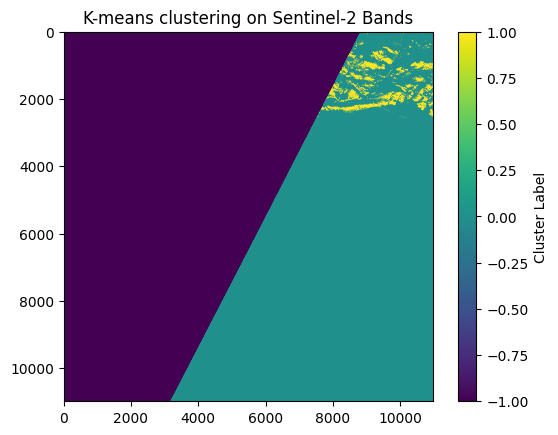

In [8]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/Week_4/UnsupervisedLearning/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4','B3','B2']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 3))

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()




In [9]:
band_stack.shape

(10980, 10980, 3)

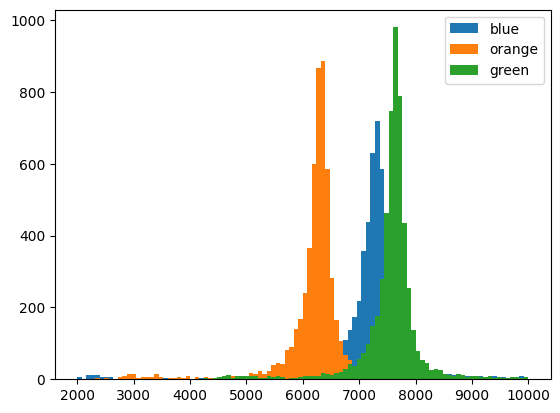

In [10]:
plt.hist(band_stack[::100,::100,0].ravel(),bins=100,range=(2000,10000), label='blue')
plt.hist(band_stack[::100,::100,1].ravel(),bins=100,range=(2000,10000), label='orange')
plt.hist(band_stack[::100,::100,2].ravel(),bins=100,range=(2000,10000), label='green')
plt.legend()
plt.show()

### GMM Implementation

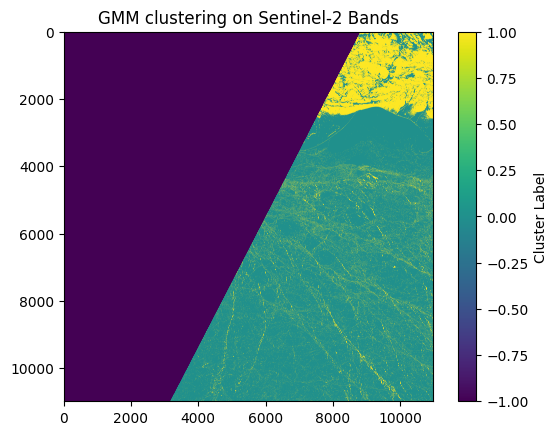

In [1]:
import rasterio
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Paths to the band images
base_path = "/content/drive/MyDrive/Week_4/UnsupervisedLearning/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for GMM, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 1))

# GMM clustering
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gmm.predict(X)

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place GMM labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('GMM clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()


For Sentinel-2, the image generated using GMM method shows clearer details in identifications of sea-ice and lead than K-means clustering. Though here I used only one band image (B4) for GMM methods as it crashes every time when I run all three of them.

## Altimetry Classification
Now, let's explore the application of these unsupervised methods to altimetry classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-3 altimetry dataset.

### Read in Functions Needed
Before delving into the modeling process, it's crucial to preprocess the data to ensure compatibility with our analytical models. This involves transforming the raw data into meaningful variables, such as peakniness and stack standard deviation (SSD), etc.

In [2]:
#
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import glob
from matplotlib.patches import Polygon
import scipy.spatial as spatial
from scipy.spatial import KDTree
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster

#=========================================================================================================
#===================================  SUBFUNCTIONS  ======================================================
#=========================================================================================================

#*args and **kwargs allow you to pass an unspecified number of arguments to a function,
#so when writing the function definition, you do not need to know how many arguments will be passed to your function
#**kwargs allows you to pass keyworded variable length of arguments to a function.
#You should use **kwargs if you want to handle named arguments in a function.
#double star allows us to pass through keyword arguments (and any number of them).
def peakiness(waves, **kwargs):

    "finds peakiness of waveforms."

    #print("Beginning peakiness")
    # Kwargs are:
    #          wf_plots. specify a number n: wf_plots=n, to show the first n waveform plots. \

    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import time

    print("Running peakiness function...")

    size=np.shape(waves)[0] #.shape property is a tuple of length .ndim containing the length of each dimensions
                            #Tuple of array dimensions.

    waves1=np.copy(waves)

    if waves1.ndim == 1: #number of array dimensions
        print('only one waveform in file')
        waves2=waves1.reshape(1,np.size(waves1)) #numpy.reshape(a, newshape, order='C'), a=array to be reshaped
        waves1=waves2

    # *args is used to send a non-keyworded variable length argument list to the function
    def by_row(waves, *args):
        "calculate peakiness for each waveform"
        maximum=np.nanmax(waves)
        if maximum > 0:

            maximum_bin=np.where(waves==maximum)
            #print(maximum_bin)
            maximum_bin=maximum_bin[0][0]
            waves_128=waves[maximum_bin-50:maximum_bin+78]

            waves=waves_128

            noise_floor=np.nanmean(waves[10:20])
            where_above_nf=np.where(waves > noise_floor)

            if np.shape(where_above_nf)[1] > 0:
                maximum=np.nanmax(waves[where_above_nf])
                total=np.sum(waves[where_above_nf])
                mean=np.nanmean(waves[where_above_nf])
                peaky=maximum/mean

            else:
                peaky = np.nan
                maximum = np.nan
                total = np.nan

        else:
            peaky = np.nan
            maximum = np.nan
            total = np.nan

        if 'maxs' in args:
            return maximum
        if 'totals' in args:
            return total
        if 'peaky' in args:
            return peaky

    peaky=np.apply_along_axis(by_row, 1, waves1, 'peaky') #numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)

    if 'wf_plots' in kwargs:
        maximums=np.apply_along_axis(by_row, 1, waves1, 'maxs')
        totals=np.apply_along_axis(by_row, 1, waves1, 'totals')

        for i in range(0,kwargs['wf_plots']):
            if i == 0:
                print("Plotting first "+str(kwargs['wf_plots'])+" waveforms")

            plt.plot(waves1[i,:])#, a, col[i],label=label[i])
            plt.axhline(maximums[i], color='green')
            plt.axvline(10, color='r')
            plt.axvline(19, color='r')
            plt.xlabel('Bin (of 256)')
            plt.ylabel('Power')
            plt.text(5,maximums[i],"maximum="+str(maximums[i]))
            plt.text(5,maximums[i]-2500,"total="+str(totals[i]))
            plt.text(5,maximums[i]-5000,"peakiness="+str(peaky[i]))
            plt.title('waveform '+str(i)+' of '+str(size)+'\n. Noise floor average taken between red lines.')
            plt.show()


    return peaky

#=========================================================================================================
#=========================================================================================================
#=========================================================================================================


def unpack_gpod(variable):

    from scipy.interpolate import interp1d

    time_1hz=SAR_data.variables['time_01'][:]
    time_20hz=SAR_data.variables['time_20_ku'][:]
    time_20hzC = SAR_data.variables['time_20_c'][:]

    out=(SAR_data.variables[variable][:]).astype(float)  # convert from integer array to float.

    #if ma.is_masked(dataset.variables[variable][:]) == True:
    #print(variable,'is masked. Removing mask and replacing masked values with nan')
    out=np.ma.filled(out, np.nan)

    if len(out)==len(time_1hz):

        print(variable,'is 1hz. Expanding to 20hz...')
        out = interp1d(time_1hz,out,fill_value="extrapolate")(time_20hz)

    if len(out)==len(time_20hzC):
        print(variable, 'is c band, expanding to 20hz ku band dimension')
        out = interp1d(time_20hzC,out,fill_value="extrapolate")(time_20hz)
    return out


#=========================================================================================================
#=========================================================================================================
#=========================================================================================================

def calculate_SSD(RIP):

    from scipy.optimize import curve_fit
    # from scipy import asarray as ar,exp
    from numpy import asarray as ar, exp

    do_plot='Off'

    def gaussian(x,a,x0,sigma):
            return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

    SSD=np.zeros(np.shape(RIP)[0])*np.nan
    x=np.arange(np.shape(RIP)[1])

    for i in range(np.shape(RIP)[0]):

        y=np.copy(RIP[i])
        y[(np.isnan(y)==True)]=0

        if 'popt' in locals():
            del(popt,pcov)

        SSD_calc=0.5*(np.sum(y**2)*np.sum(y**2)/np.sum(y**4))
        #print('SSD calculated from equation',SSD)

        #n = len(x)
        mean_est = sum(x * y) / sum(y)
        sigma_est = np.sqrt(sum(y * (x - mean_est)**2) / sum(y))
        #print('est. mean',mean,'est. sigma',sigma_est)

        try:
            popt,pcov = curve_fit(gaussian, x, y, p0=[max(y), mean_est, sigma_est],maxfev=10000)
        except RuntimeError as e:
            print("Gaussian SSD curve-fit error: "+str(e))
            #plt.plot(y)
            #plt.show()

        except TypeError as t:
            print("Gaussian SSD curve-fit error: "+str(t))

        if do_plot=='ON':

            plt.plot(x,y)
            plt.plot(x,gaussian(x,*popt),'ro:',label='fit')
            plt.axvline(popt[1])
            plt.axvspan(popt[1]-popt[2], popt[1]+popt[2], alpha=0.15, color='Navy')
            plt.show()

            print('popt',popt)
            print('curve fit SSD',popt[2])

        if 'popt' in locals():
            SSD[i]=abs(popt[2])


    return SSD


In [3]:
# Specifying path to Sentinel-3 data
path = '/content/drive/MyDrive/Week_4/UnsupervisedLearning'
SAR_file = '/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3'
SAR_data = Dataset(path + SAR_file + '/enhanced_measurement.nc')

SAR_lat = unpack_gpod('lat_20_ku')
SAR_lon = unpack_gpod('lon_20_ku')
waves   = unpack_gpod('waveform_20_ku')
sig_0   = unpack_gpod('sig0_water_20_ku')
RIP     = unpack_gpod('rip_20_ku')
flag = unpack_gpod('surf_type_class_20_ku')

# Filter out bad data points using criteria (here, lat >= -99999)
find = np.where(SAR_lat >= -99999)
SAR_lat = SAR_lat[find]
SAR_lon = SAR_lon[find]
waves   = waves[find]
sig_0   = sig_0[find]
RIP     = RIP[find]

# Calculate additional features
PP = peakiness(waves)
SSD = calculate_SSD(RIP)

# Convert to numpy arrays (if not already)
sig_0_np = np.array(sig_0)
PP_np    = np.array(PP)
SSD_np   = np.array(SSD)

# Create data matrix
data = np.column_stack((sig_0_np, PP_np, SSD_np))

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

Running peakiness function...


<ipython-input-2-df8dce6d9cd2>:63: RuntimeWarning: Mean of empty slice
  noise_floor=np.nanmean(waves[10:20])


Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.


In [63]:
data_normalized.shape

(24827, 3)

There are some NaN values in the dataset so one way to deal with this is to delete them.

In [6]:
# Remove any rows that contain NaN values
nan_count = np.isnan(data_normalized).sum()
print(f"Number of NaN values in the array: {nan_count}")

data_cleaned = data_normalized[~np.isnan(data_normalized).any(axis=1)]

mask = ~np.isnan(data_normalized).any(axis=1)
waves_cleaned = np.array(waves)[mask]
flag_cleaned = np.array(flag)[mask]

data_cleaned = data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]
waves_cleaned = waves_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]
flag_cleaned = flag_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]


Number of NaN values in the array: 1283


# K-Means
Now, let's proceed with running the K-Means model as usual. Remember, you have the flexibility to substitute this with GMM or any other preferred model.

In [42]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_cleaned)
clusters_kmeans = kmeans.predict(data_cleaned)

We can also inspect how many data points are there in each class of your clustering prediction.

In [43]:
unique, counts = np.unique(clusters_kmeans, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Cluster counts:", class_counts)

Cluster counts: {0: 8947, 1: 3248}


In [44]:
waves_cleaned[clusters_kmeans == 0].shape # where 8880 pixels are classified as sea-ice

(8947, 256)

In [45]:
waves_cleaned[clusters_kmeans == 1].shape # where 3315 pixels are classified as leads

(3248, 256)

We can plot the mean waveform of each class.

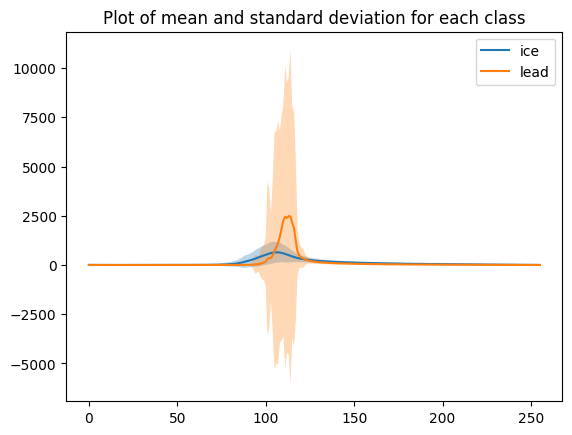

In [46]:
# mean and standard deviation for all echoes
mean_ice = np.mean(waves_cleaned[clusters_kmeans==0],axis=0)
std_ice = np.std(waves_cleaned[clusters_kmeans==0], axis=0)

plt.plot(mean_ice, label='ice')
plt.fill_between(range(len(mean_ice)), mean_ice - std_ice, mean_ice + std_ice, alpha=0.3)


mean_lead = np.mean(waves_cleaned[clusters_kmeans==1],axis=0)
std_lead = np.std(waves_cleaned[clusters_kmeans==1], axis=0)

plt.plot(mean_lead, label='lead')
plt.fill_between(range(len(mean_lead)), mean_lead - std_lead, mean_lead + std_lead, alpha=0.3)

plt.title('Plot of mean and standard deviation for each class')
plt.legend()

The average shapes of echoes produced by sea-ice and lead shows significant difference, where the peak of echo oflead is narrower and much higher than echoes produced by sea-ice. In addition, though the total number of echoes being identified as lead is less than sea-ice, the standdard deviation of lead is much wider.

Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_kmeans = 0 (sea-ice)')

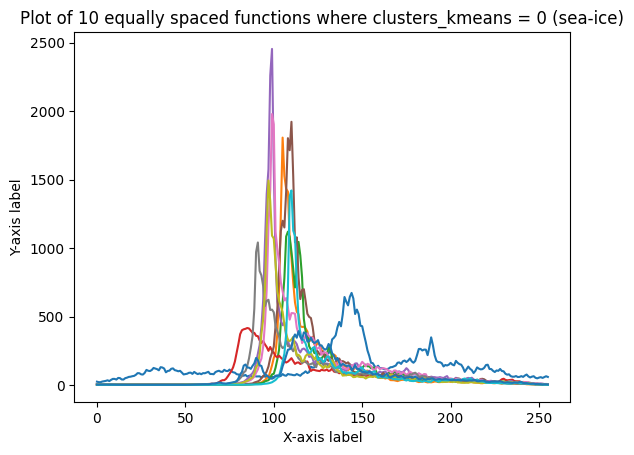

In [66]:
# Extract 10 equally spaced functions where clusters_kmeans is equal to 0
functions_to_plt = waves_cleaned[clusters_kmeans == 0][::len(waves_cleaned[clusters_kmeans == 0]) // 10]
# plot of each function
for i, function in enumerate(functions_to_plt):
    plt.plot(function)#, label=f'Function {i+1}')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

plt.title('Plot of 10 equally spaced functions where clusters_kmeans = 0 (sea-ice)')


Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_kmeans = 1 (leads)')

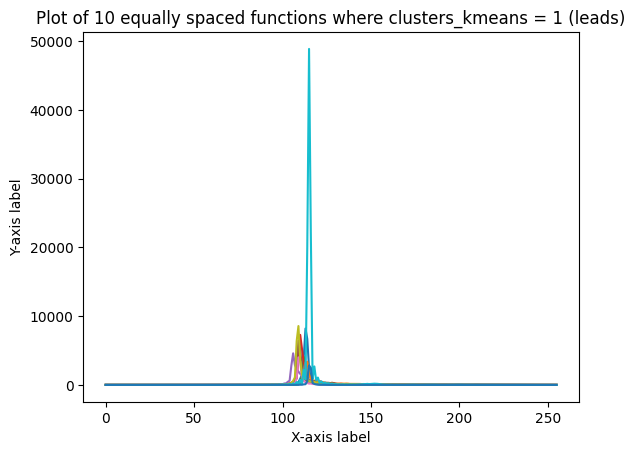

In [67]:
# Extract 10 equally spaced functions where clusters_kmeans is equal to 1
functions_to_plt = waves_cleaned[clusters_kmeans == 1][::len(waves_cleaned[clusters_kmeans == 1]) // 10]
# plot of each function
for i, function in enumerate(functions_to_plt):
    plt.plot(function)#, label=f'Function {i+1}')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

plt.title('Plot of 10 equally spaced functions where clusters_kmeans = 1 (leads)')


Waveform Alignment Using Cross-Correlation

This code aligns waveforms in the cluster where `clusters_kmeans == 0` by using cross-correlation to compare the shapes.



Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_kmeans = 0 (aligned)')

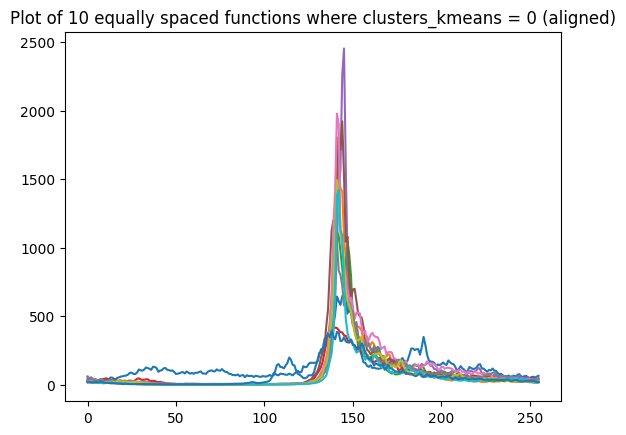

In [51]:
from scipy.signal import correlate

# Find the reference point (e.g., the peak)
reference_point_index = np.argmax(np.mean(waves_cleaned[clusters_kmeans==0], axis=0))

# Calculate cross-correlation with the reference point
aligned_waves = []
for wave in waves_cleaned[clusters_kmeans==0][::len(waves_cleaned[clusters_kmeans == 0]) // 10]:
    correlation = correlate(wave, waves_cleaned[clusters_kmeans==0][0])
    shift = len(wave) - np.argmax(correlation)
    aligned_wave = np.roll(wave, shift)
    aligned_waves.append(aligned_wave)

# Plot aligned waves
for aligned_wave in aligned_waves:
    plt.plot(aligned_wave)

plt.title('Plot of 10 equally spaced functions where clusters_kmeans = 0 (aligned)')

Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_kmeans = 1 (aligned)')

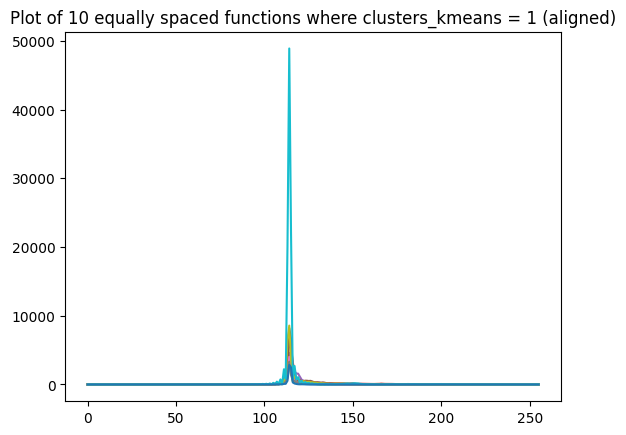

In [52]:
from scipy.signal import correlate

# Find the reference point (e.g., the peak)
reference_point_index = np.argmax(np.mean(waves_cleaned[clusters_kmeans==1], axis=0))

# Calculate cross-correlation with the reference point
aligned_waves = []
for wave in waves_cleaned[clusters_kmeans==1][::len(waves_cleaned[clusters_kmeans == 1]) // 10]:
    correlation = correlate(wave, waves_cleaned[clusters_kmeans==1][0])
    shift = len(wave) - np.argmax(correlation)
    aligned_wave = np.roll(wave, shift)
    aligned_waves.append(aligned_wave)

# Plot aligned waves
for aligned_wave in aligned_waves:
    plt.plot(aligned_wave)

plt.title('Plot of 10 equally spaced functions where clusters_kmeans = 1 (aligned)')

By comparing the aligned shapes of echoes of sea-ice and lead, it's quite obvious that echoes of lead is much narrower and has higher peak than that of sea-ice.

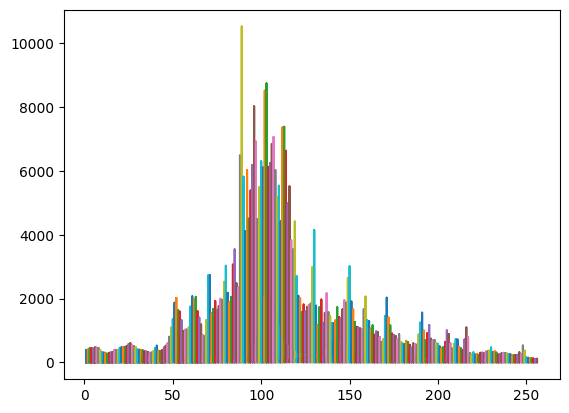

In [59]:
# plot echos for the sea ice cluster
x = np.stack([np.arange(1,waves_cleaned[clusters_kmeans==0].shape[1]+1)]*waves_cleaned[clusters_kmeans==0].shape[0])
plt.plot(x,waves_cleaned[clusters_kmeans==0])  # plot of all the echos
plt.show()

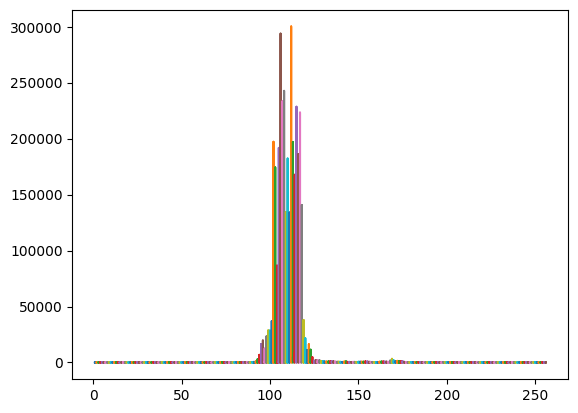

In [60]:
# plot echos for the lead cluster
x = np.stack([np.arange(1,waves_cleaned[clusters_kmeans==1].shape[1]+1)]*waves_cleaned[clusters_kmeans==1].shape[0])
plt.plot(x,waves_cleaned[clusters_kmeans==1])  # plot of all the echos
plt.show()

# GMM

Now, let's proceed with running the GMM model as usual. Remember, you have the flexibility to substitute this with K-Means or any other preferred model.

In [7]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data_cleaned)
clusters_gmm = gmm.predict(data_cleaned)

We can also inspect how many data points are there in each class of your clustering prediction.

In [8]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Cluster counts:", class_counts)

Cluster counts: {0: 8880, 1: 3315}


In [12]:
waves_cleaned[clusters_gmm == 0].shape # where 8880 pixels are classified as sea-ice

(8880, 256)

In [40]:
waves_cleaned[clusters_gmm == 1].shape # where 3315 pixels are classified as leads

(3315, 256)

We can plot the mean waveform of each class.

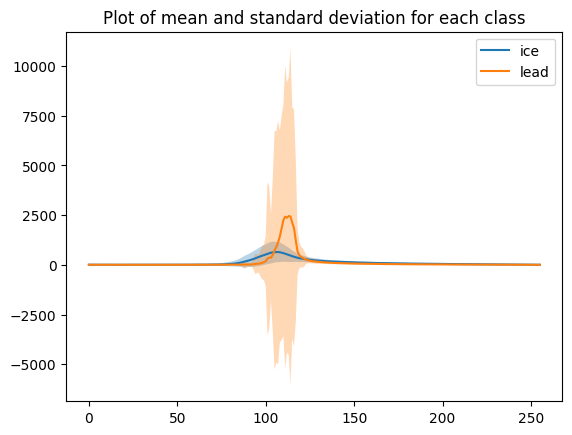

In [13]:
# mean and standard deviation for all echoes
mean_ice = np.mean(waves_cleaned[clusters_gmm==0],axis=0)
std_ice = np.std(waves_cleaned[clusters_gmm==0], axis=0)

plt.plot(mean_ice, label='ice')
plt.fill_between(range(len(mean_ice)), mean_ice - std_ice, mean_ice + std_ice, alpha=0.3)


mean_lead = np.mean(waves_cleaned[clusters_gmm==1],axis=0)
std_lead = np.std(waves_cleaned[clusters_gmm==1], axis=0)

plt.plot(mean_lead, label='lead')
plt.fill_between(range(len(mean_lead)), mean_lead - std_lead, mean_lead + std_lead, alpha=0.3)

plt.title('Plot of mean and standard deviation for each class')
plt.legend()

By comparison, the mean and standard deviation using GMM clustering is nearly the same as for K-Means

Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_gmm = 0 (sea-ice)')

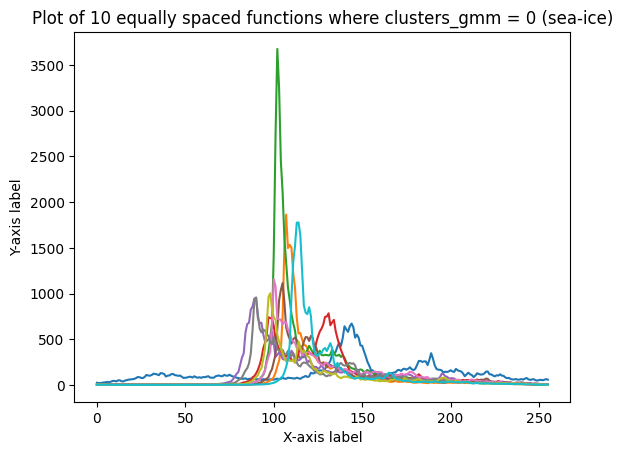

In [68]:
# Extract 10 equally spaced functions where clusters_gmm is equal to 0
functions_to_plt = waves_cleaned[clusters_gmm == 0][::len(waves_cleaned[clusters_gmm == 0]) // 10]
# plot of each function
for i, function in enumerate(functions_to_plt):
    plt.plot(function)#, label=f'Function {i+1}')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

plt.title('Plot of 10 equally spaced functions where clusters_gmm = 0 (sea-ice)')


Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_gmm = 1 (leads)')

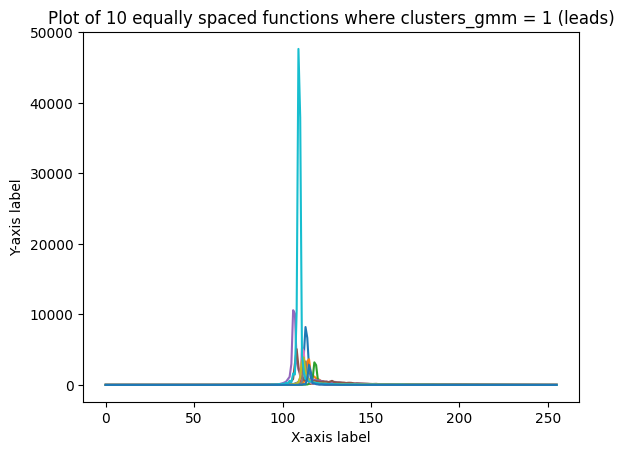

In [69]:
# Extract 10 equally spaced functions where clusters_gmm is equal to 1
functions_to_plt = waves_cleaned[clusters_gmm == 1][::len(waves_cleaned[clusters_gmm == 1]) // 10]
# plot of each function
for i, function in enumerate(functions_to_plt):
    plt.plot(function)#, label=f'Function {i+1}')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

plt.title('Plot of 10 equally spaced functions where clusters_gmm = 1 (leads)')


Waveform Alignment

Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_gmm = 0 (aligned)')

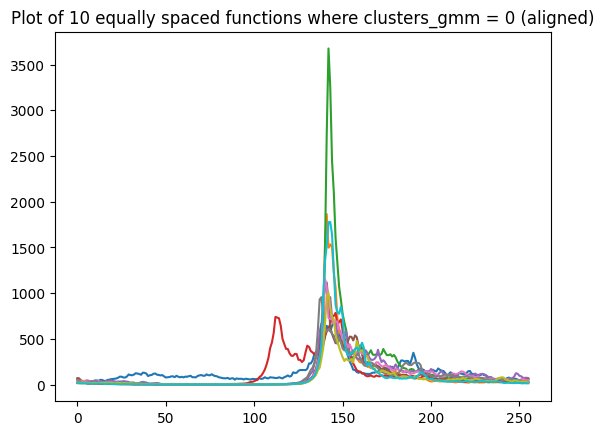

In [32]:
from scipy.signal import correlate

# Find the reference point (e.g., the peak)
reference_point_index = np.argmax(np.mean(waves_cleaned[clusters_gmm==0], axis=0))

# Calculate cross-correlation with the reference point
aligned_waves = []
for wave in waves_cleaned[clusters_gmm==0][::len(waves_cleaned[clusters_gmm == 0]) // 10]:
    correlation = correlate(wave, waves_cleaned[clusters_gmm==0][0])
    shift = len(wave) - np.argmax(correlation)
    aligned_wave = np.roll(wave, shift)
    aligned_waves.append(aligned_wave)

# Plot aligned waves
for aligned_wave in aligned_waves:
    plt.plot(aligned_wave)

plt.title('Plot of 10 equally spaced functions where clusters_gmm = 0 (aligned)')

Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_gmm = 1 (aligned)')

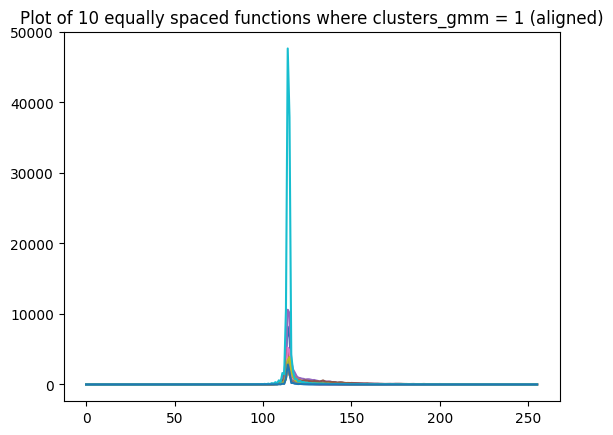

In [39]:
from scipy.signal import correlate

# Find the reference point (e.g., the peak)
reference_point_index = np.argmax(np.mean(waves_cleaned[clusters_gmm==1], axis=0))

# Calculate cross-correlation with the reference point
aligned_waves = []
for wave in waves_cleaned[clusters_gmm==1][::len(waves_cleaned[clusters_gmm == 1]) // 10]:
    correlation = correlate(wave, waves_cleaned[clusters_gmm==1][0])
    shift = len(wave) - np.argmax(correlation)
    aligned_wave = np.roll(wave, shift)
    aligned_waves.append(aligned_wave)

# Plot aligned waves
for aligned_wave in aligned_waves:
    plt.plot(aligned_wave)

plt.title('Plot of 10 equally spaced functions where clusters_gmm = 1 (aligned)')

Overall, GMM shows similar results as to K-Means.

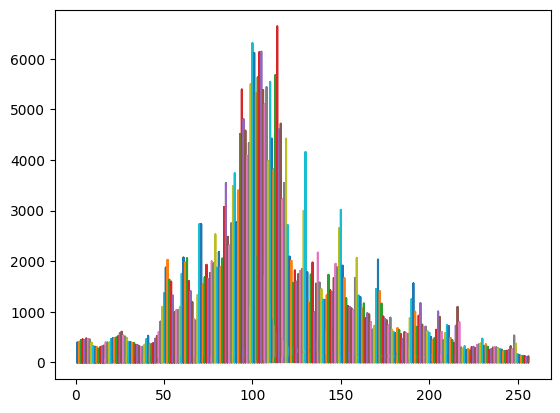

In [58]:
# plot echos for the sea ice cluster
x = np.stack([np.arange(1,waves_cleaned[clusters_gmm==0].shape[1]+1)]*waves_cleaned[clusters_gmm==0].shape[0])
plt.plot(x,waves_cleaned[clusters_gmm==0])  # plot of all the echos
plt.show()

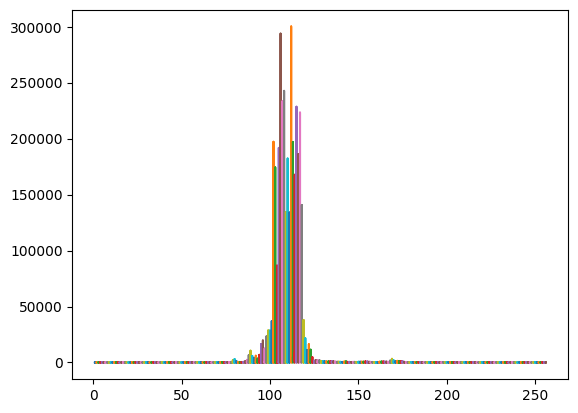

In [57]:
# plot echos for the lead cluster
x = np.stack([np.arange(1,waves_cleaned[clusters_gmm==1].shape[1]+1)]*waves_cleaned[clusters_gmm==1].shape[0])
plt.plot(x,waves_cleaned[clusters_gmm==1])  # plot of all the echos
plt.show()

## Compare with ESA data
In the ESA dataset, sea ice = 1 and lead = 2. Therefore, we need to subtract 1 from it so our predicted labels are comparable with the official product labels. Confusion matrices can be produced to compare the results from both k-means and GMM clustering with ESA classification (ground truth)

In [53]:
flag_cleaned_modified = flag_cleaned - 1

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = flag_cleaned_modified   # true labels from the ESA dataset
predicted_kmeans = clusters_kmeans    # predicted labels from k-means method

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_kmeans)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(true_labels, predicted_kmeans)

# Print classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[8872    6]
 [  75 3242]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      8878
         1.0       1.00      0.98      0.99      3317

    accuracy                           0.99     12195
   macro avg       0.99      0.99      0.99     12195
weighted avg       0.99      0.99      0.99     12195



In [55]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = flag_cleaned_modified   # true labels from the ESA dataset
predicted_gmm = clusters_gmm          # predicted labels from GMM method

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_gmm)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(true_labels, predicted_gmm)

# Print classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[8856   22]
 [  24 3293]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8878
         1.0       0.99      0.99      0.99      3317

    accuracy                           1.00     12195
   macro avg       1.00      1.00      1.00     12195
weighted avg       1.00      1.00      1.00     12195

